<a href="https://colab.research.google.com/github/Bitirna/reimagined-doodle/blob/main/BEML_and_GLAXO_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

In [4]:
df_beml = pd.read_csv("/content/BEML.csv")

In [5]:
df_glaxo = pd.read_csv("/content/GLAXO.csv")

In [6]:
df_beml[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [7]:
df_beml[["Date","Close"]]

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [8]:
df_glaxo[["Date","Close"]]

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
...,...,...
1734,2016-12-26,2723.50
1735,2016-12-27,2701.75
1736,2016-12-28,2702.15
1737,2016-12-29,2727.90


In [21]:
df_glaxo = df_glaxo.set_index(pd.DatetimeIndex(df_glaxo["Date"]))
df_beml = df_beml.set_index(pd.DatetimeIndex(df_beml["Date"]))

In [20]:
df_glaxo

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Gain
Date,,,,,,,,,
2010-01-05,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58,-0.005444
2010-01-06,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09,0.013422
2010-01-07,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00,0.006225
2010-01-08,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11,-0.005398
2010-01-11,2010-01-11,1659.00,1694.95,1601.05,1630.0,1629.45,10566.0,173.40,-0.006312
...,...,...,...,...,...,...,...,...,...
2016-12-26,2016-12-26,2703.00,2740.00,2677.00,2715.0,2723.50,3953.0,107.15,-0.001283
2016-12-27,2016-12-27,2722.95,2725.00,2683.00,2692.0,2701.75,10600.0,286.10,-0.007986
2016-12-28,2016-12-28,2701.75,2718.00,2690.00,2698.0,2702.15,6050.0,163.44,0.000148


Text(0, 0.5, 'Close price')

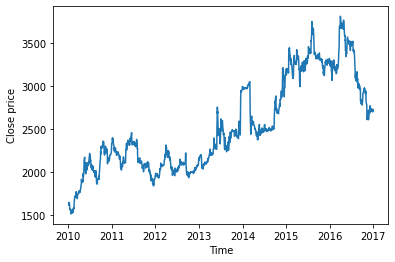

In [14]:
plt.plot(df_glaxo.Close)
plt.xlabel('Time')
plt.ylabel('Close price')

Text(0, 0.5, 'Close price')

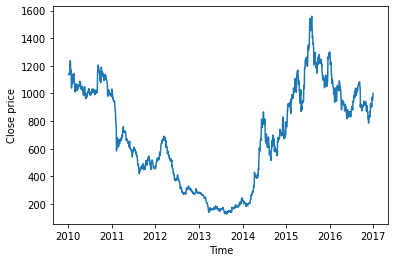

In [15]:
plt.plot(df_beml.Close)
plt.xlabel('Time')
plt.ylabel('Close price')

In [17]:
df_glaxo["Gain"] = df_glaxo.Close.pct_change(periods = 1)
df_beml["Gain"] = df_beml.Close.pct_change(periods = 1)

In [19]:
df_glaxo

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Gain
Date,,,,,,,,,
2010-01-05,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58,-0.005444
2010-01-06,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09,0.013422
2010-01-07,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00,0.006225
2010-01-08,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11,-0.005398
2010-01-11,2010-01-11,1659.00,1694.95,1601.05,1630.0,1629.45,10566.0,173.40,-0.006312
...,...,...,...,...,...,...,...,...,...
2016-12-26,2016-12-26,2703.00,2740.00,2677.00,2715.0,2723.50,3953.0,107.15,-0.001283
2016-12-27,2016-12-27,2722.95,2725.00,2683.00,2692.0,2701.75,10600.0,286.10,-0.007986
2016-12-28,2016-12-28,2701.75,2718.00,2690.00,2698.0,2702.15,6050.0,163.44,0.000148


In [18]:
df_glaxo = df_glaxo.dropna()
df_beml = df_beml.dropna()

Text(0, 0.5, 'Gain')

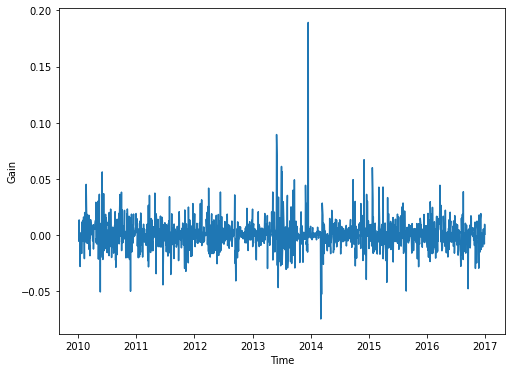

In [24]:
plt.figure(figsize = (8,6))
plt.plot(df_glaxo.index,df_glaxo.Gain)
plt.xlabel("Time")
plt.ylabel("Gain")

Text(0, 0.5, 'Gain')

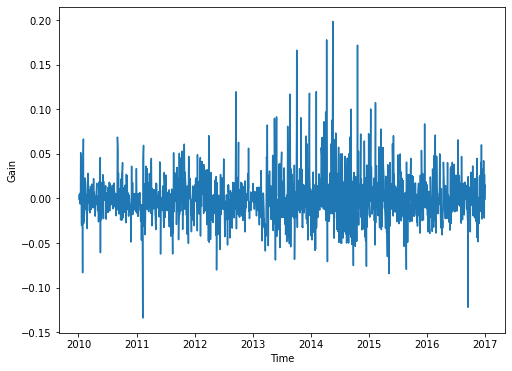

In [25]:
plt.figure(figsize = (8,6))
plt.plot(df_beml.index,df_beml.Gain)
plt.xlabel("Time")
plt.ylabel("Gain")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


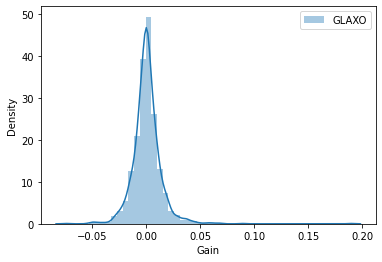

In [28]:
sn.distplot(df_glaxo.Gain, label ="GLAXO")
plt.xlabel("Gain")
plt.ylabel("Density")
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


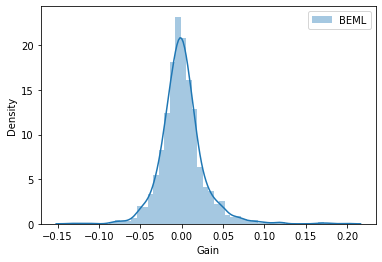

In [29]:
sn.distplot(df_beml.Gain, label ="BEML")
plt.xlabel("Gain")
plt.ylabel("Density")
plt.legend()

In [33]:
print('GlAXO Mean is',round(df_glaxo.Gain.mean(),4))
print('GLAXO Standard Deviation is',round(df_glaxo.Gain.std(),4))

GlAXO Mean is 0.0004
GLAXO Standard Deviation is 0.0134


In [34]:
print('BEML Mean is',round(df_beml.Gain.mean(),4))
print('BEML Standard Deviation is',round(df_beml.Gain.std(),4))

BEML Mean is 0.0003
BEML Standard Deviation is 0.0264


In [37]:
# probability of making 2% loss or higher in glaxo
stats.norm.cdf(-0.02,loc = df_glaxo.Gain.mean(),scale = df_glaxo.Gain.std())


0.06352488667177397

In [38]:
# probability of making 2% gain or higher in glaxo
1-stats.norm.cdf(0.02,loc = df_glaxo.Gain.mean(),scale = df_glaxo.Gain.std())

0.07104511457618568

In [39]:
# probability of making 2% loss or higher in beml
stats.norm.cdf(-0.02,loc = df_beml.Gain.mean(),scale = df_beml.Gain.std())

0.22155987503755292

In [40]:
# probability of making 2% gain or higher
1-stats.norm.cdf(0.02,loc = df_beml.Gain.mean(),scale = df_beml.Gain.std())

0.22769829484075343

In [44]:
# calculation of confidence interval at 95%
df_glaxo_ci = stats.norm.interval(0.95, loc = df_glaxo.Gain.mean(), scale = df_glaxo.Gain.std())
print("Gain for GLAXO at 95% confidence interval is ", np.round(df_glaxo_ci,4))

Gain for GLAXO at 95% confidence interval is  [-0.0258  0.0266]


In [45]:

df_beml_ci = stats.norm.interval(0.95, loc = df_beml.Gain.mean(), scale = df_beml.Gain.std())
print("Gain for BEML at 95% confidence interval is ", np.round(df_beml_ci,4))

Gain for BEML at 95% confidence interval is  [-0.0515  0.0521]
